- # LGMVIP - Data Science Intern
- # Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM
- # Submitted by: Purvajya Vilas Gawarshettiwar

- # Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

- # Load Data

In [2]:
data = pd.read_csv('E:\\Internships\\NSE-TATAGLOBAL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


- # Sort with date

In [5]:
data['Date']= pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.reset_index(inplace= True)

In [8]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
df_close = df['Close']

Text(0.5, 1.0, 'Stock Prediction')

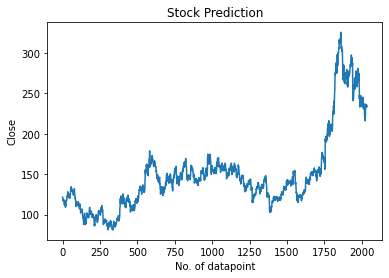

In [10]:
plt.plot(df_close)
plt.xlabel('No. of datapoint')
plt.ylabel('Close')
plt.title('Stock Prediction')

In [11]:
df1=df['Close']

- # Prepare data

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

- # Splitting dataset into train and test

In [13]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(1424, 611)

- # convert an array of values into a dataset matrix

In [15]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

- # reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

- # reshape input to be [samples, time steps, features] which is required for LSTM

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

- # Create the Stacked LSTM model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
19/19 [==============================] - 15s 400ms/step - loss: 0.0113 - accuracy: 8.4034e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 5s 280ms/step - loss: 0.0019 - accuracy: 8.4034e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 5s 286ms/step - loss: 9.4770e-04 - accuracy: 8.4034e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 5s 258ms/step - loss: 8.3195e-04 - accuracy: 8.4034e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 5s 257ms/step - loss: 8.5287e-04 - accuracy: 8.4034e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 5s 254ms/step - loss: 8.3291e-04 - accuracy: 8.4034e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 5s 258ms/step - loss: 7.9910e-0

- # Lets Do the prediction and check performance metrics

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.026551317577839854

In [27]:
from sklearn import metrics
np.round(metrics.r2_score(y_train, train_predict),2)

0.93

- # calculate RMSE performance metrics

In [28]:
math.sqrt(mean_squared_error(ytest, test_predict))

0.0653080988595018

In [29]:
np.round(metrics.r2_score(ytest, test_predict),2)

0.93

- # Transformback to original form

In [31]:
train_predict =scaler.inverse_transform(train_predict)
test_predict =scaler.inverse_transform(test_predict)
y_train =scaler.inverse_transform(y_train.reshape(-1,1))
ytest =scaler.inverse_transform(ytest.reshape(1,-1))

- # Plotting

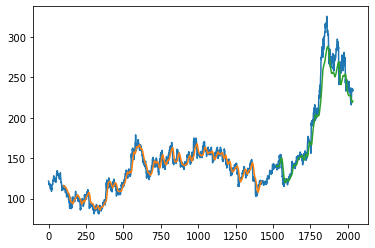

In [32]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [35]:
from numpy import array
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5759968]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [36]:
day_new = np.arange(1,101)
day_pred = np.arange(101,161)

In [37]:
df3 = df1.tolist()
df3.extend(lst_output)

In [38]:
len(df1)

2035

ValueError: x and y must have same first dimension, but have shapes (60,) and (30, 1)

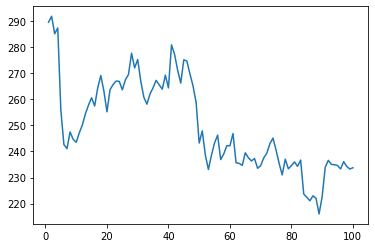

In [41]:
plt.plot(day_new, scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.xlabel('No. of datapoint')
plt.ylabel('Close')
plt.title('Stock Prediction')




